# Plotting and animating proteins using Neurosnap Tools
In this tutorial we will be demonstrating how to use the [Neurosnap Tools package](https://github.com/NeurosnapInc/neurosnap/) to create figures and animations of proteins similar to that of ColabFold.

### Plotting protein structures as pseudo 3D
The pseudo 3D plots can be useful for getting a quick representation of a protein structure on the fly, not to mention they look cool.
The algorithm itself was originally written by Dr. Sergey Ovchinnikov and adapted from https://github.com/sokrypton/ColabDesign/blob/16e03c23f2a30a3dcb1775ac25e107424f9f7352/colabdesign/shared/plot.py

![Animated protein](https://raw.githubusercontent.com/NeurosnapInc/neurosnap/refs/heads/main/assets/protein_animation_random.gif "Animated protein")

#### Part 1. Load Protein
The first step is to create a Neurosnap Protein Structure. In this example we'll be using the 1NKP from the PDB. 1NKP features a crystal structure of Myc-Max transcription factors recognizing DNA.

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

from neurosnap.protein import Protein, animate_pseudo_3D, plot_pseudo_3D

with warnings.catch_warnings(): # not necessary but I put it here to hide an annoying warning
  warnings.simplefilter("ignore") # not necessary but I put it here to hide an annoying warning
  prot = Protein("1nkp") # actually required

print(prot)
print("Models:", prot.models())
print("Chains:", prot.chains())
print("Sequence of A chain:", prot.get_aas(0, "A"))
display(display(prot.df))

[*] Found matching structure in RCSB PDB, downloading and using that.


<Neurosnap Protein: Models=[0], Chains=[F, G, H, J, A, B, D, E], Atoms=4906>
Models: [0]
Chains: ['F', 'G', 'H', 'J', 'A', 'B', 'D', 'E']
Sequence of A chain: GHMNVKRRTHNVLERQRRNELKRSFFALRDQIPELENNEKAPKVVILKKATAYILSVQAEEQKLISEEDLLRKRREQLKHKLEQLGGC


,model,chain,res_id,res_name,res_type,atom,atom_name,bfactor,x,y,z,mass
0,0,F,101,DC,NUCLEOTIDE,1,O5',36.00,44.956001,100.718002,28.400999,15.9994
1,0,F,101,DC,NUCLEOTIDE,2,C5',31.76,44.591999,102.009003,27.914000,12.0107
2,0,F,101,DC,NUCLEOTIDE,3,C4',31.62,45.755001,102.972000,27.983999,12.0107
3,0,F,101,DC,NUCLEOTIDE,4,O4',29.66,46.231998,103.060997,29.350000,15.9994
4,0,F,101,DC,NUCLEOTIDE,5,C3',30.84,46.969002,102.580002,27.139999,12.0107
...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0,E,545,HOH,HETEROGEN,4910,O,40.32,52.041000,46.731998,76.541000,15.9994
4902,0,E,554,HOH,HETEROGEN,4911,O,44.19,19.108999,18.027000,82.807999,15.9994
4903,0,E,559,HOH,HETEROGEN,4912,O,43.97,45.117001,48.303001,77.320000,15.9994
4904,0,E,563,HOH,HETEROGEN,4913,O,50.82,46.472000,22.031000,63.610001,15.9994


None

#### Part 2. Plot Protein
Next we are going to extract the X, Y, and Z coordinates from all the atoms in our protein and use those to create our figure.

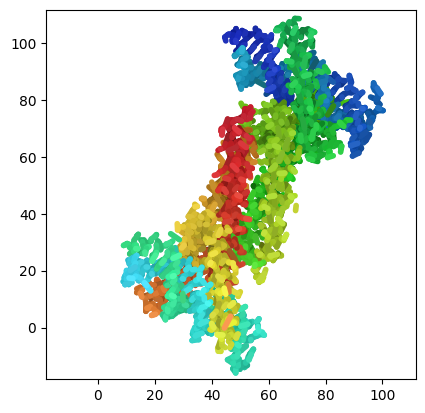

In [2]:
fig, ax = plt.subplots()
plot_pseudo_3D(prot.df[["x", "y", "z"]], ax=ax) # default coloring using residue indices

plt.show()
# Alternatively, you can save the image using the following: 
# plt.savefig("protein.png")

#### Part 3. Plot Settings
We can modify some basic aspects of our plot such as removing the axes, setting a title, and changing the DPI (Dots per Inch) to improve image quality. For additional options reference the [matplotlib documentation](https://matplotlib.org/).

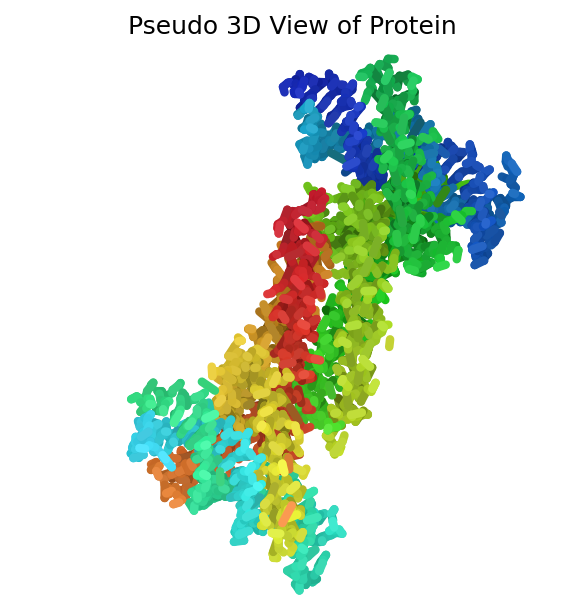

In [3]:
fig, ax = plt.subplots()
plot_pseudo_3D(prot.df[["x", "y", "z"]], ax=ax) # default coloring using residue indices

# remove axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# set title
ax.set_title("Pseudo 3D View of Protein")

# set DPI
fig.set_dpi(150)

plt.show()

#### Part 4. Plot Properties
Aside from coloring from N to C termini, we can also control the coloring pattern we use using a the `c` parameter. In this example we are going to color by the `res_type` property to color our structure depending on whether the atom is an amino acid, nucleotide, or heterogen. In the figure below you can see the protein being colored in blue, the DNA colored in red, and the heterogens colored in green.

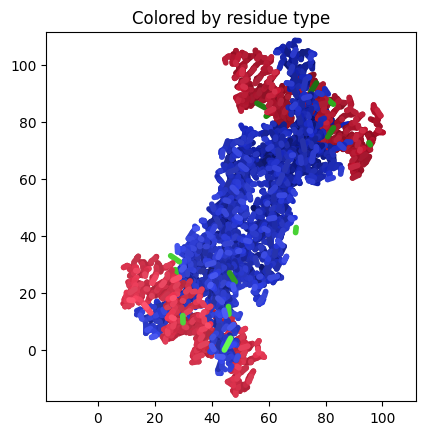

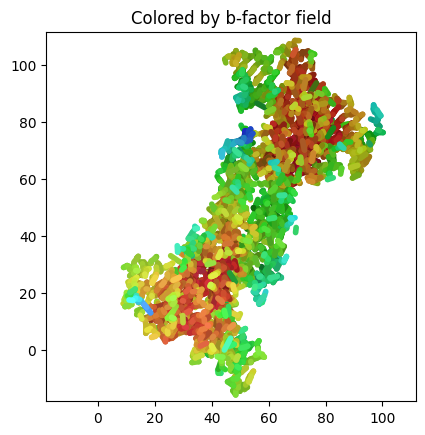

In [4]:
# Color by residue type
fig, ax = plt.subplots()
unique_mapping = {res_type: i for i, res_type in enumerate(prot.df["res_type"].unique())} # create map of residue types to integers
plot_pseudo_3D(prot.df[["x", "y", "z"]], ax=ax, c=prot.df["res_type"].map(unique_mapping))
ax.set_title("Colored by residue type")
plt.show()

# Color by bfactor field
fig, ax = plt.subplots()
plot_pseudo_3D(prot.df[["x", "y", "z"]], ax=ax, c=prot.df["bfactor"])
ax.set_title("Colored by b-factor field")
plt.show()

#### Part 5. Color by pLDDT for AlphaFold2
For AlphaFold2 structures we can use the package to fetch structures directly from AF-DB using their UniProt accessions. In this example we will fetch the AlphaFold2 predicted structure of the [beta-lactamase enzyme](https://alphafold.ebi.ac.uk/entry/P00807) and color it locally by its pLDDT value. The pLDDT field is a per residue confidence metric where highers numbers tend to be correlated with higher quality predictions. For more information on interpreting these values check out [our blog post](https://neurosnap.ai/blog/post/6422432aa55063d26e9c06a1).

[*] Found matching structure in AF-DB, downloading and using that.


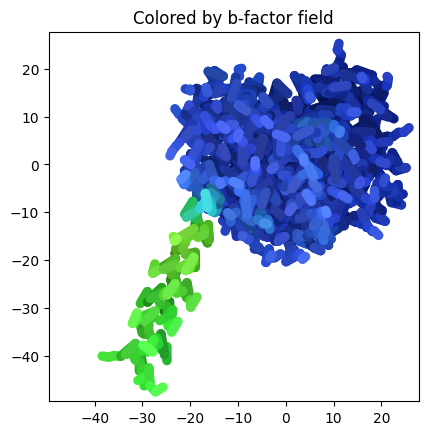

In [7]:
prot2 = Protein("P00807")

# Color by bfactor field
fig, ax = plt.subplots()
plot_pseudo_3D(prot2.df[["x", "y", "z"]], ax=ax, c=prot2.df["bfactor"], cmin=0, cmax=100)
ax.set_title("Colored by b-factor field")
plt.show()

#### Part 6. Creating Animations
Finally, to wrap everything up we are going to demonstrate how to animate these plots. For the sake of creating a fun example, we are going to create a random numpy array and supply that to the `c` parameter. We are going to do this 10 times to create an animation.

Creating frame 1/20
Creating frame 2/20
Creating frame 3/20
Creating frame 4/20
Creating frame 5/20
Creating frame 6/20
Creating frame 7/20
Creating frame 8/20
Creating frame 9/20
Creating frame 10/20
Creating frame 11/20
Creating frame 12/20
Creating frame 13/20
Creating frame 14/20
Creating frame 15/20
Creating frame 16/20
Creating frame 17/20
Creating frame 18/20
Creating frame 19/20
Creating frame 20/20


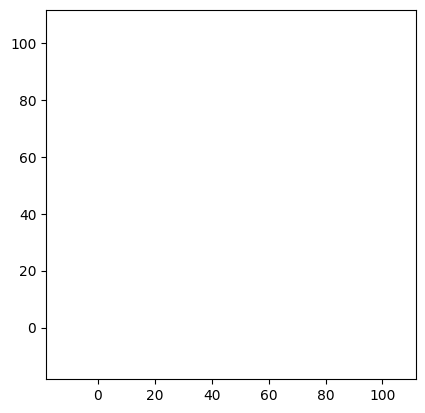

In [6]:
fig, ax = plt.subplots()
frames = []
num_frames = 20 # number of frames to generate
for i in range(num_frames):
  print(f"Creating frame {i+1}/{num_frames}")
  frame = plot_pseudo_3D(prot.df[["x", "y", "z"]], ax=ax, c=np.random.randint(50, size=len(prot.df))) # random coloring
  frames.append(frame)

ani = animate_pseudo_3D(fig, frames)

# Save the animation to a file (optional)
# ani.save("protein_animation.gif", writer="ffmpeg", fps=60)

# Alternatively, you can display it in the notebook or with plt.show()
plt.show() # might not display correctly in notebook since animated